In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [60]:
amostra_df = pd.read_csv("Tabelas/amostras_df.csv", encoding='utf-8')

In [61]:
amostra_df['Data da Coleta'] = pd.to_datetime(amostra_df['Data da Coleta'])
amostra_df = amostra_df.set_index("Data da Coleta")

In [62]:
amostra_df['Ano'] = amostra_df.index.year
amostra_df['Mes'] = amostra_df.index.month
amostra_df['Dia'] = amostra_df.index.day

In [63]:
amostra_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes,Dia
Data da Coleta,,,,,,,,,,
2012-01-02,S,RS,TRAMANDAI,ETANOL,2.499,Litro,IPIRANGA,2012,1,2
2012-01-02,S,RS,NOVO HAMBURGO,DIESEL,2.049,Litro,PETROBRAS DISTRIBUIDORA S.A.,2012,1,2
2012-01-02,SE,SP,TUPA,GASOLINA,2.790,Litro,RAIZEN,2012,1,2
2012-01-02,SE,SP,ARARAQUARA,GASOLINA,2.529,Litro,BRANCA,2012,1,2
2012-01-02,NE,BA,CAMACARI,DIESEL,1.980,Litro,RAIZEN,2012,1,2


In [64]:
analise_ano_mes_dia = amostra_df[['Ano', 'Mes', 'Dia']].describe().transpose()
analise_ano_mes_dia.to_csv("Tabelas/analise_ano_mes_dia.csv", encoding='utf-8')
analise_ano_mes_dia

,count,mean,std,min,25%,50%,75%,max
Ano,1675306.0,2016.464044,3.211905,2012.0,2014.0,2016.0,2019.0,2022.0
Mes,1675306.0,6.303879,3.439876,1.0,3.0,6.0,9.0,12.0
Dia,1675306.0,15.696550,8.776227,1.0,8.0,16.0,23.0,31.0


Analise por Ano

In [65]:
analise_ano = amostra_df.groupby('Ano')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_ano.to_csv("Tabelas/analise_ano.csv", encoding='utf-8')
analise_ano

Ano
2012    463,477.56
2013    502,228.51
2014    465,713.97
2015    476,337.84
2016    467,824.36
2017    385,114.00
2018    536,203.05
2019    566,467.52
2020    395,760.36
2021    634,881.87
2022    832,595.46
Name: Valor de Venda, dtype: object

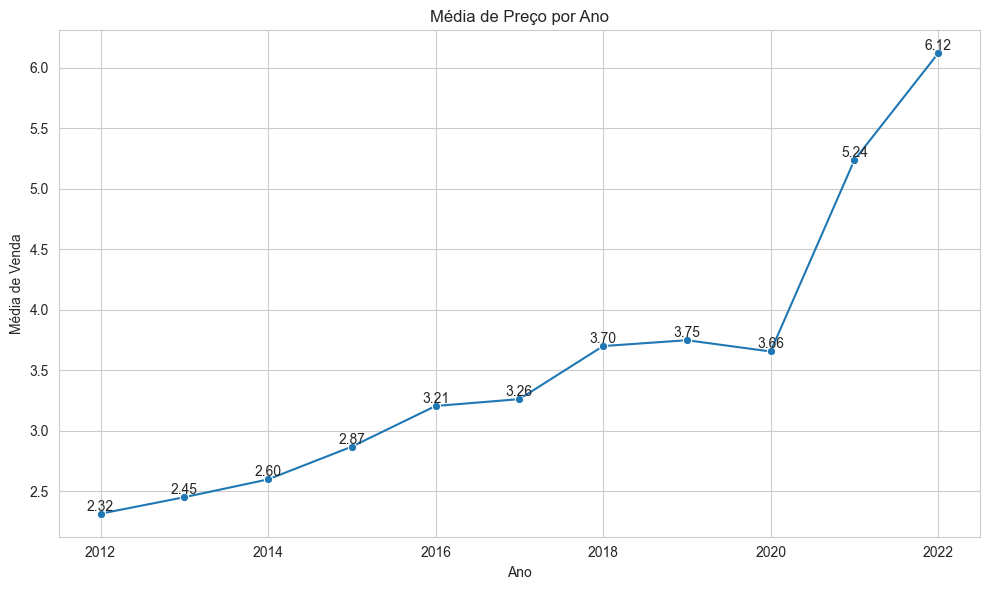

In [66]:
media_vendas_por_ano = amostra_df.groupby('Ano')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_ano = sns.lineplot(x=media_vendas_por_ano.index, y=media_vendas_por_ano.values, marker="o")

plt.title("Média de Preço por Ano")
plt.xlabel("Ano")
plt.ylabel("Média de Venda")

for ano, valor_medio in media_vendas_por_ano.items():
    plt.text(ano, valor_medio, f'{valor_medio:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Media-de-Preço-por-Ano.png")

plt.show()

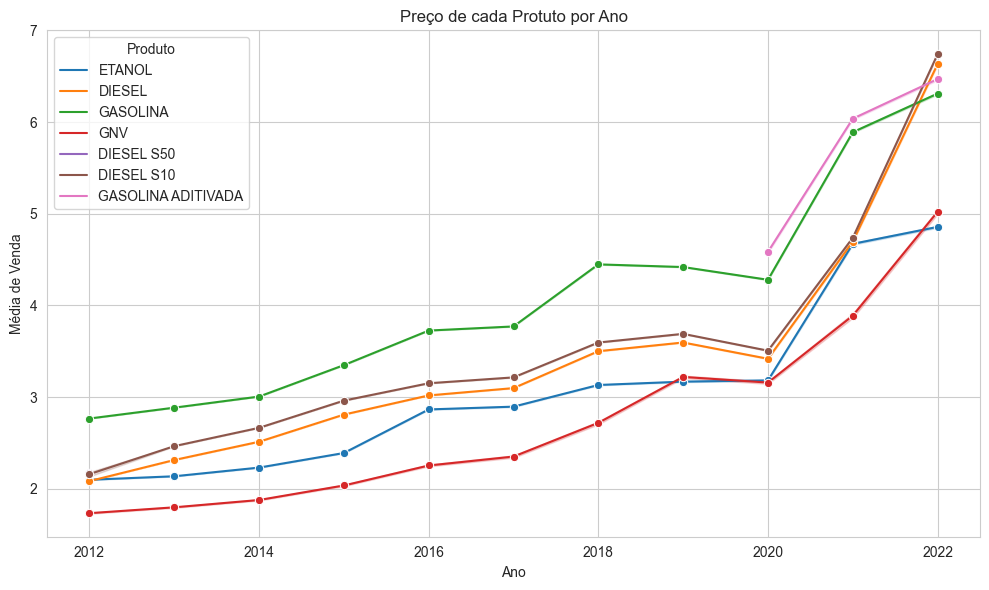

In [67]:
media_vendas_por_ano = amostra_df.groupby('Ano')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_ano = sns.lineplot(amostra_df, x="Ano", y="Valor de Venda", hue='Produto', marker="o")

plt.title("Preço de cada Protuto por Ano")
plt.xlabel("Ano")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Protuto-por-Ano.png")

plt.show()

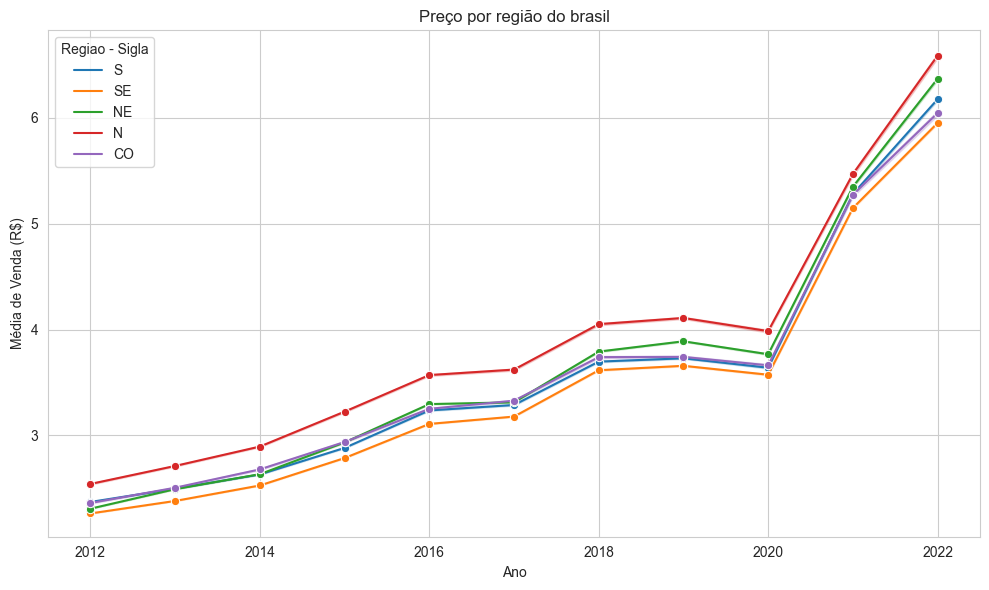

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_regiao = sns.lineplot(amostra_df, x="Ano", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço por região do brasil")
plt.xlabel("Ano")
plt.ylabel("Média de Venda (R$)")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-por-região-do-brasil.png")

plt.show()

Analise por Mes

In [69]:
analise_mes = amostra_df.groupby('Mes')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_mes.to_csv("Tabelas/analise_mes.csv", encoding='utf-8')
analise_mes

Mes
1     503,535.60
2     461,839.89
3     525,191.63
4     517,766.50
5     491,562.92
6     484,835.64
7     536,720.71
8     492,966.18
9     392,388.72
10    417,025.55
11    434,669.86
12    468,101.29
Name: Valor de Venda, dtype: object

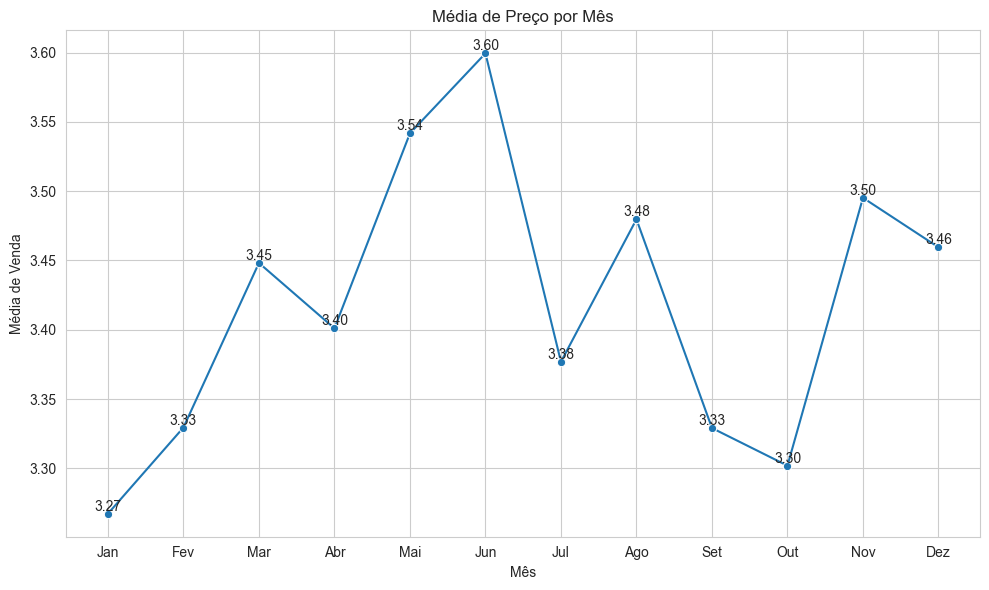

In [70]:
media_vendas_por_mes = amostra_df.groupby('Mes')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(x=media_vendas_por_mes.index, y=media_vendas_por_mes.values, marker="o")

plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title("Média de Preço por Mês")
plt.xlabel("Mês")
plt.ylabel("Média de Venda")

for mes, valor_medio in media_vendas_por_mes.items():
    plt.text(mes, valor_medio, f'{valor_medio:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Media-de-Preço-por-Mes.png")

plt.show()

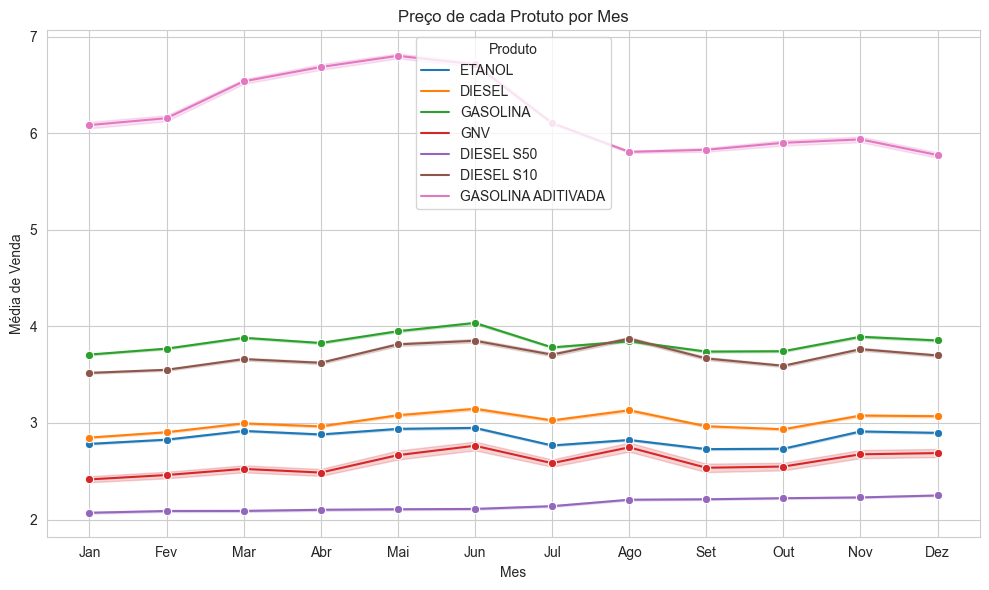

In [71]:
media_vendas_por_mes = amostra_df.groupby('Mes')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(amostra_df, x="Mes", y="Valor de Venda", hue='Produto', marker="o")

plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title("Preço de cada Protuto por Mes")
plt.xlabel("Mes")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Protuto-por-Mes.png")

plt.show()

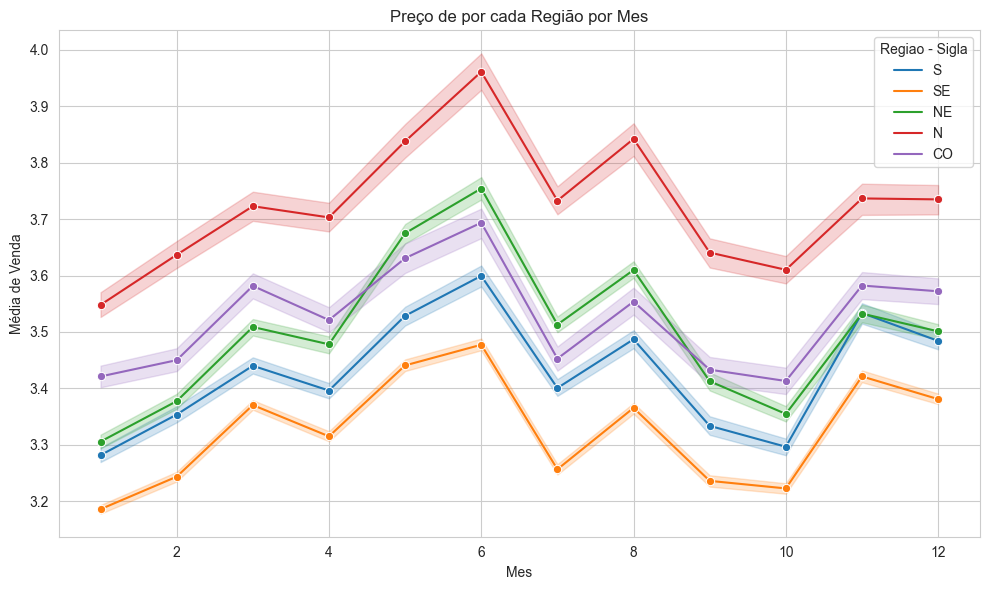

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes_regiao = sns.lineplot(amostra_df, x="Mes", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço de por cada Região por Mes")
plt.xlabel("Mes")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-por-cada-Região-por-Mes.png")

plt.show()

In [73]:
analise_dia = amostra_df.groupby('Dia')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_dia.to_csv("Tabelas/analise_dia.csv", encoding='utf-8')
analise_dia

Dia
1     168,457.54
2     195,358.29
3     191,741.35
4     192,245.54
5     196,212.47
6     196,575.98
7     175,006.52
8     188,884.83
9     178,237.57
10    201,233.55
11    197,274.99
12    182,092.48
13    201,025.97
14    180,951.35
15    188,424.81
16    187,381.71
17    197,298.32
18    198,371.66
19    169,546.11
20    189,914.96
21    175,248.05
22    199,227.53
23    198,622.42
24    176,210.65
25    180,518.90
26    182,890.02
27    199,239.26
28    182,072.22
29    181,364.38
30    180,791.37
31     94,183.75
Name: Valor de Venda, dtype: object

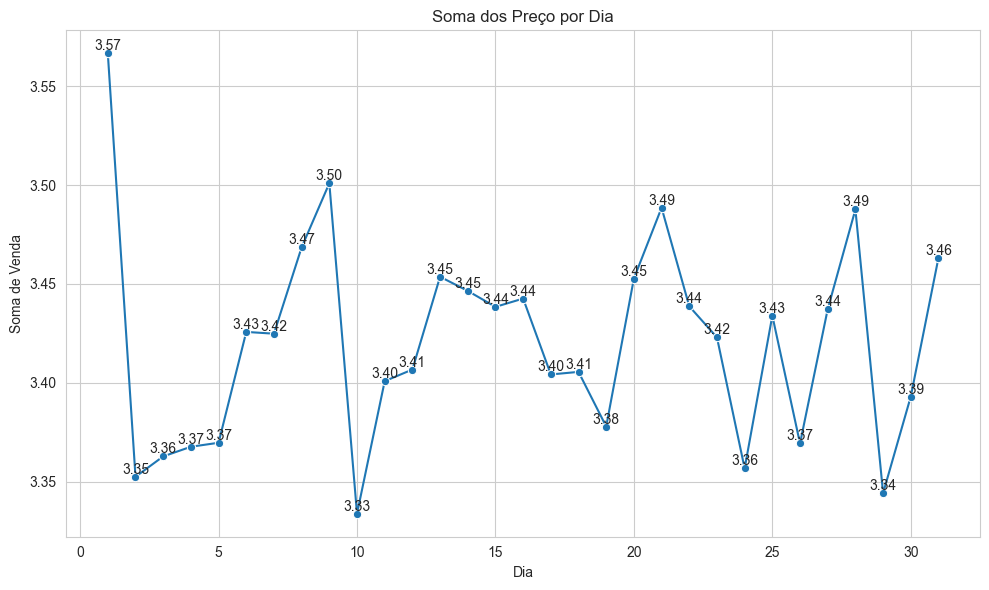

In [74]:
media_vendas_por_dia = amostra_df.groupby('Dia')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
grafico_dia = sns.lineplot(x=media_vendas_por_dia.index, y=media_vendas_por_dia.values, marker="o")
plt.title("Soma dos Preço por Dia")
plt.xlabel("Dia")
plt.ylabel("Soma de Venda")

for dia, valor_soma in media_vendas_por_dia.items():
    plt.text(dia, valor_soma, f'{valor_soma:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Soma-dos-Preço-por-Dia.png")

plt.show()

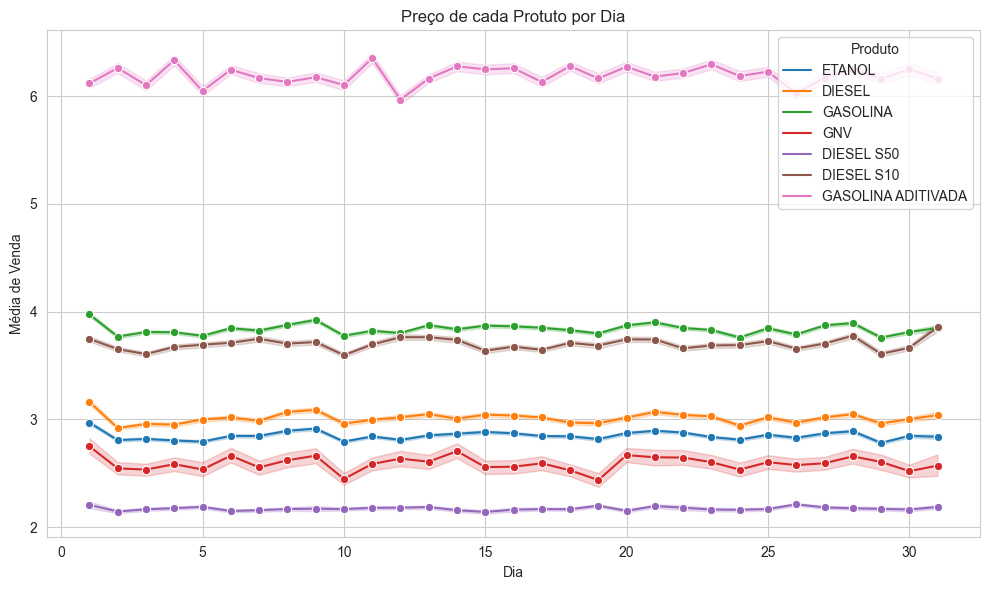

In [75]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(amostra_df, x="Dia", y="Valor de Venda", hue='Produto', marker="o")

plt.title("Preço de cada Protuto por Dia")
plt.xlabel("Dia")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Protuto-por-Dia.png")

plt.show()

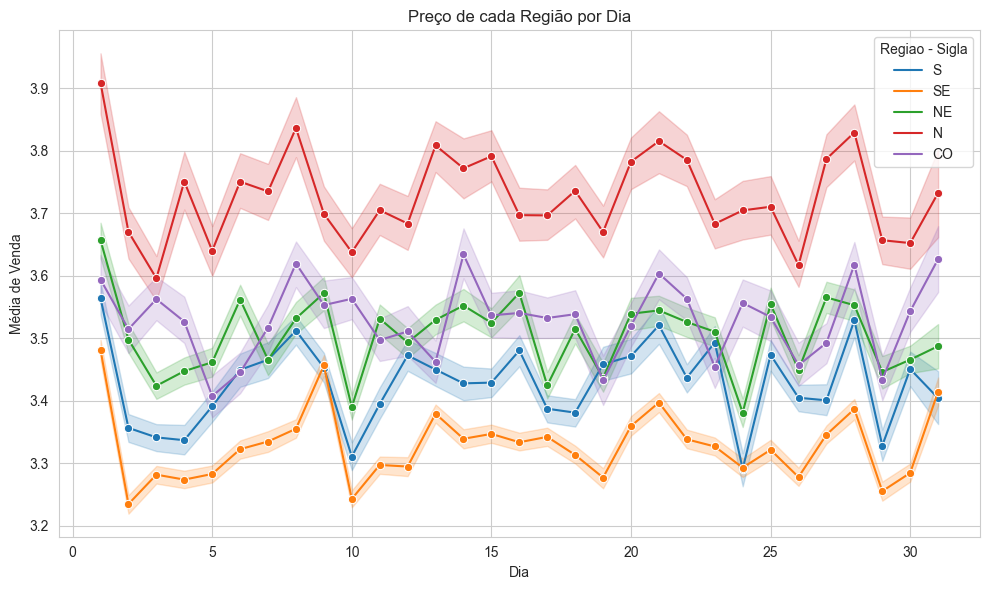

In [76]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_dia_regiao = sns.lineplot(amostra_df, x="Dia", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço de cada Região por Dia")
plt.xlabel("Dia")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Região-por-Dia.png")

plt.show()

In [77]:
amostra_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675306 entries, 2012-01-02 to 2022-12-30
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Regiao - Sigla     1675306 non-null  object 
 1   Estado - Sigla     1675306 non-null  object 
 2   Municipio          1675306 non-null  object 
 3   Produto            1675306 non-null  object 
 4   Valor de Venda     1675306 non-null  float64
 5   Unidade de Medida  1675306 non-null  object 
 6   Bandeira           1675306 non-null  object 
 7   Ano                1675306 non-null  int32  
 8   Mes                1675306 non-null  int32  
 9   Dia                1675306 non-null  int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 121.4+ MB
